# Beginner data cleaning tutorial
## Most of the information comes from the pandas kaggle course
> [Kaggle data cleaning course](https://www.kaggle.com/learn/data-cleaning)

> **data** is stored in ./data/NFL-play-by-play
***

In [7]:
# preparation
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)

In [9]:
# load dataset
nfl_df = pd.read_csv('./data/NFL-play-by-play/NFL Play by Play 2009-2017 (v4).csv', low_memory=False)

## Handling Missing Values

The first thing we'll need to do is load in the libraries and dataset we'll be using.

**The first thing** to do when you get a new dataset **is take a look at some of it**. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

In [10]:
nfl_df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


### How many missing data points do we have?

In [13]:
miss_data_count = nfl_df.isnull().sum()
miss_data_count.iloc[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

That seems like a lot! **It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem**

In [26]:
# it seems like 
## total_cells = np.product(nfl_df.shape())
total_cells = nfl_df.size

# it seems like
## miss_data_count.sum()
miss_cells = miss_data_count.sum()

percent_missing = (miss_cells / total_cells) * 100

print(f"percent of missing data is {percent_missing}")

percent of missing data is 24.87214126835169


Wow, almost a quarter of the cells in this dataset are empty! In the next step, we're going to take a closer look at some of the columns with missing values and try to figure out what might be going on with them.

### Figure out why the data is missing (**imputation**)

For dealing with missing values, you'll need to use your intution to figure out why the value is missing. One of the most important questions you can ask yourself to help figure this out is this:

> **Is this value missing because it wasn't recorded or because it doesn't exist?**



If **a value is missing becuase it doesn't exist** (like the height of the oldest child of someone who doesn't have any children) then **it doesn't make sense to try and guess what it might be**. These values you probably do want to keep as NaN

if **a value is missing because it wasn't recorded**, then you can **try to guess what it might have been based on the other values in that column and row**.

This is called **imputation**

In [36]:
# # look at the # of missing points in the first ten columns
nfl_df.isnull().sum().iloc[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

By looking at the **documentation**, You can see that this **column has information on the number of seconds left in the game when the play was made**. **This means that these values are probably missing because they were not recorded**, rather than because they don't exist. So, it would make sense for us to try and guess what they should be rather than just leaving them as NA's.

On the other hand, **there are other fields, like "PenalizedTeam" that also have lot of missing fields**. In this case, though, the field is missing because if there was no penalty then it doesn't make sense to say which team was penalized. **For this column**, it would make more sense to either **leave it empty or to add a third value like "neither" and use that to replace the NA's**.

> **Tip**: This is a great place to read over the dataset documentation if you haven't already! If you're working with a dataset that you've gotten from another person, you can also try reaching out to them to get more information.



### Drop missing values

If you're in a hurry or don't have a reason to figure out why your values are missing**, one option you have is to just remove any rows or columns that contain missing values. **(Note: I don't generally recommend this approch for important projects! It's usually worth it to take the time to go through your data and really look at all the columns with missing values one-by-one to really get to know your dataset.)**

If you're sure you want to drop rows with missing values, pandas does have a handy function, dropna() to help you do this. Let's try it out on our NFL dataset!

In [38]:
# remove all the rows that contain a missing value
nfl_df.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oops, it looks like that's removed all our data! 😱 This is because every row in our dataset had at least one missing value. 

In [45]:
# trying to do it for columns
clean_nfl_df = nfl_df.dropna(axis=1).head()

let's calculate how much data did we lose?

In [47]:
print("Columns in df: {0}".format(nfl_df.shape[1]))
print("Columns in df without NA: {0}".format(clean_nfl_df.shape[1]))

Columns in df: 102
Columns in df without NA: 41


We've lost quite a bit of data, but at this point we have successfully removed all the NaN's from our data.

### Filling in missing values automatically 

Another option is to try and fill in the missing values. For this next bit, I'm getting a small sub-section of the NFL data so that it will print well.

In [49]:
subset_nfl_data = nfl_df.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


We can use the Panda's `fillna()` function to fill in missing values in a dataframe for us. One option we have is to specify what we want the `NaN` values to be replaced with. Here, I'm saying that I would like to replace all the `NaN` values with 0.

In [50]:
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


I could also be a bit more savvy and replace missing values with whatever value comes directly after it in the same column. (This makes a lot of sense for datasets where the observations have some sort of logical order to them.)

In [51]:
# replace all NA's the value that comes directly after it in the same column, 
# then replace all the remaining na's with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Scaling and Normalization

In [4]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

### Scaling vs Normalization: What's the difference?

* in **scaling**, you're __changing the range__ of your data, while
* in **normalization**, you're __changing the shape__ of the distribution of your data.

### Scaling 

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support `vector machines (SVM)` or `k-nearest neighbors (KNN)`. With these algorithms, a change of "1" in any numeric feature is given the same importance.

Text(0.5, 1.0, 'Scaled data')

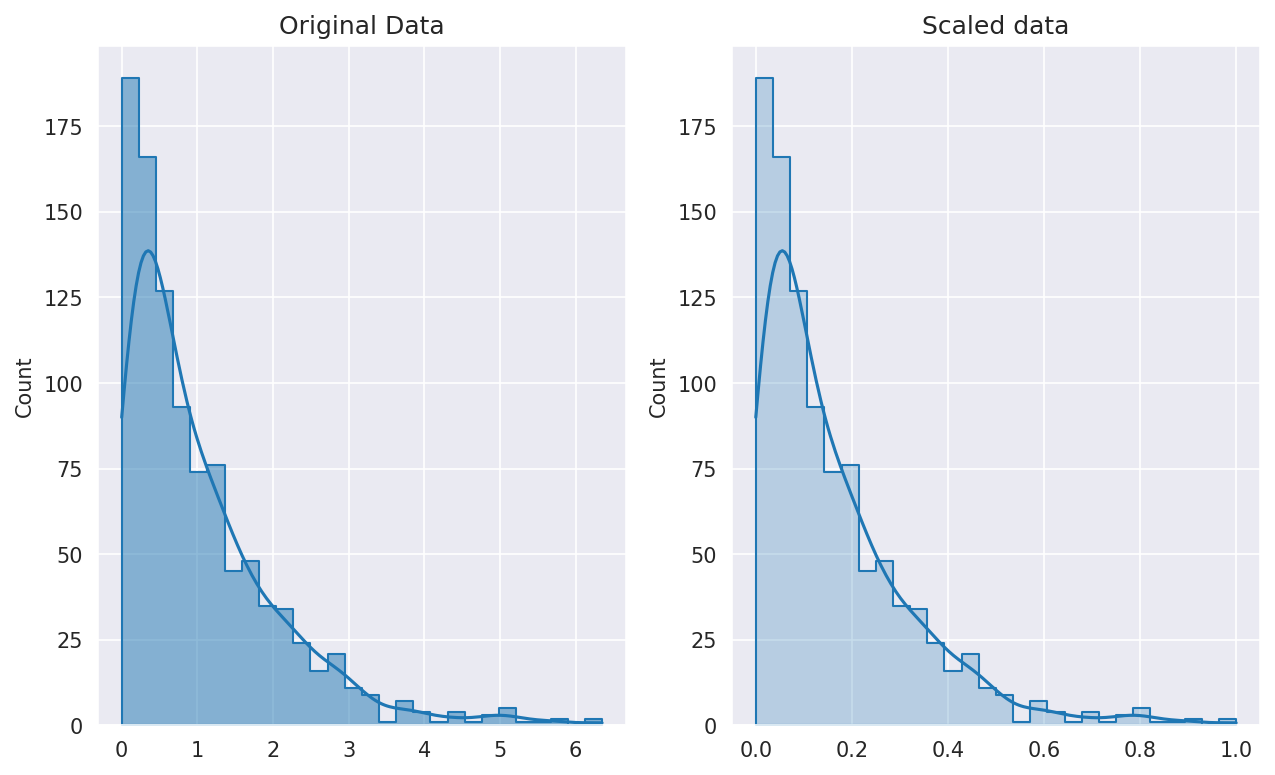

In [131]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
## in parameter "columns" u can write name of columns like 
## columns=['money'], where 'money' is column if df or series
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2, dpi=150, figsize=(10, 6))
sns.histplot(original_data, element='step', kde=True, legend=False, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_data, element='step', kde=True, legend=False, ax=ax[1])
ax[1].set_title("Scaled data")

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

### Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

> **Normal distribution**: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're using to normalize here is called the **Box-Cox Transformation**. Let's take a quick peek at what normalizing some data looks like:

/home/akira-ml/anaconda3/envs/ds-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/akira-ml/anaconda3/envs/ds-env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

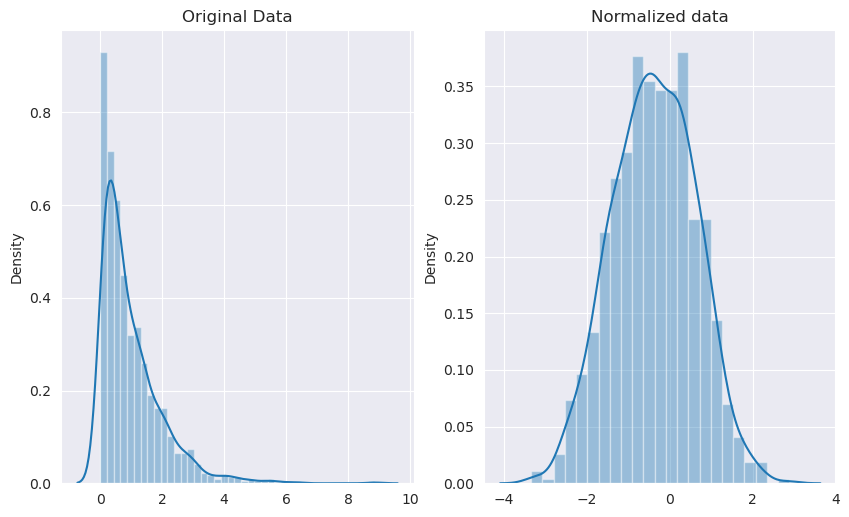

In [106]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2, dpi=100, figsize=(10, 6))
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

## Parsing Dates

In [2]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [3]:
# data
df = pd.read_csv("./data/landslide-events/catalog.csv")
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [4]:
# check date column
df.date.head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Notice that at the **bottom of the output of head()**, you can see that it says that the **data type of this column is "object"**.

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it.

If you check the pandas dtype documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html), you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

In [5]:
df.date.dtype

dtype('O')

You may have to check the [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.dtype.kind.html?highlight=kind#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

### Convert our date columns to datetime 

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. **This is called "parsing dates"** because we're taking in a string and identifying its component parts.



We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](https://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are lots of possible parts of a date, but the most common are `%d` for day, `%m` for month, `%y` **for a two-digit year** and `%Y` **for a four digit year**.

Some examples:

* 1/17/07 has the format "%m/%d/%y"

* 17-1-2007 has the format "%d-%m-%Y"


Looking back up at the head of the "date" column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates:

In [6]:
df['date_parsed'] = pd.to_datetime(df.date, format='%m/%d/%y')
df.date_parsed.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

1. **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

> `landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`



2. **Why don't you always use infer_datetime_format = True?** There are **two big reasons** not to always have pandas guess the time format. The first is that **pandas won't always been able to figure out the correct date format**, especially if someone has gotten creative with data entry. The second is that **it's much slower than specifying the exact format of the dates**.

### Select the day of the month

Now that we have a column of parsed dates, we can extract information like the day of the month that a landslide occurred.

In [7]:
day_of_month_landslides = df.date_parsed.dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

If we tried to get the same information from the original "date" column, we would get an error: `AttributeError: Can only use .dt accessor with datetimelike values`. This is because `dt.day` doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, we have to parse them before we can interact with them in a useful way.

### Plot the day of the month to check the date parsing¶


**One of the biggest dangers in parsing dates is mixing up the months and days**. The `to_datetime()` function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

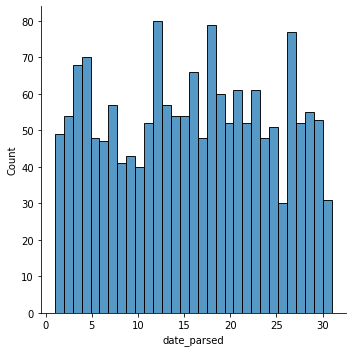

In [8]:
day_of_month_landslides = day_of_month_landslides.dropna()
sns.displot(day_of_month_landslides, bins=31, kde=False)

## Some important practise with date parsing

In [9]:
# load df
earthquakes = pd.read_csv('./data/earthquake-database/database.csv')
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
# check date type
earthquakes.Date.dtype

dtype('O')

its means `Object`

### Convert out date columns to datetime

**First of all, check the dates to make sure their format is the same**

In [13]:
# one way is check lengths
date_lens = earthquakes.Date.str.len()
date_lens.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [16]:
# we find three incorrect dates, we must correct them

idx_incorrect_dates = np.where(date_lens == 24)[0]
print(f'Theese indices are incorrect: {idx_incorrect_dates}')
earthquakes.loc[idx_incorrect_dates]

Theese indices are incorrect: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [20]:
# the simpliest way to change them in code. Do it
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"

# then parse dates
earthquakes['date_parsed'] = pd.to_datetime(earthquakes.Date, format='%m/%d/%Y')
earthquakes.date_parsed.head()

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
Name: date_parsed, dtype: datetime64[ns]

### Selecting the day of the month and check correct parsing


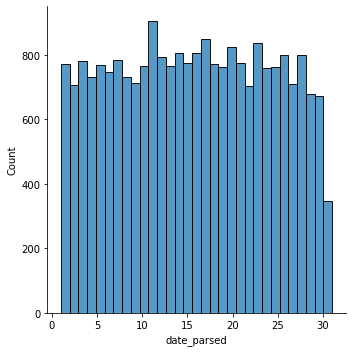

In [21]:
# try to get the day of the month from the date column
day_of_month_earthquakes = earthquakes.date_parsed.dt.day

# drop bad dates and check, that day <= 31!
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.displot(day_of_month_earthquakes, bins=31)

## Character Encodings

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

### What are encodings? 

**Character encodings** are specific sets of rules for mapping from raw binary byte strings (that look like this: 0110100001101001) to characters that make up human-readable text (like "hi"). There are many different encodings, and if you tried to read in text with a different encoding than the one it was originally written in, you ended up with scrambled text called "mojibake" (said like mo-gee-bah-kay). Here's an example of mojibake:

æ–‡å—åŒ–ã??

You might also end up with a "unknown" characters. There are what gets printed when there's no mapping between a particular byte and a character in the encoding you're using to read your byte string in and they look like this:

����������

Character encoding mismatches are less common today than they used to be, but it's definitely still a problem. There are lots of different character encodings, but the main one you need to know is UTF-8.

> UTF-8 is the standard text encoding. All Python code is in UTF-8 and, ideally, all your data should be as well. It's when things aren't in UTF-8 that you run into trouble.

It was pretty hard to deal with encodings in Python 2, but thankfully in Python 3 it's a lot simpler. (Kaggle Notebooks only use Python 3.) There are two main data types you'll encounter when working with text in Python 3. One is is the string, which is what text is by default.

In [3]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

The other data is the bytes data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [4]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors="replace")

# check the type
type(after)

bytes

If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that our euro symbol has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

In [6]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [8]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


However, when we try to use a different encoding to map our bytes into a string, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

> You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a CD player. If you try to play a cassette in a CD player, it just won't work.

In [9]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

> For example, if we try to convert a string to bytes for ASCII using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it should have been. That means we may have just made our data unusable!

In [10]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files, which we'll talk about next.

## Reading in files with encoding problems

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this:

In [29]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv('./data/kickstarter-projects/ks-projects-201801-Windows-1252.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 8271: invalid start byte

Notice that we get the same UnicodeDecodeError we got when we tried to decode UTF-8 bytes as if they were ASCII! This tells us that this file isn't actually UTF-8. We don't know what encoding it actually is though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. A better way, though, is to use the chardet module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.

I'm going to just look at the first ten thousand bytes of this file. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a large file this can be very slow.) Another reason to just look at the first part of the file is that we can see by looking at the error message that the first problem is the 11th character. So we probably only need to look at the first little bit of the file to figure out what's going on.

In [32]:
# look at the first ten thousand bytes to guess the character encoding
with open('./data/kickstarter-projects/ks-projects-201801-Windows-1252.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))

# check what the character encoding might be
print(result)

kickstarter_2016 = pd.read_csv('./data/kickstarter-projects/ks-projects-201801-Windows-1252.csv', encoding=result['encoding'], low_memory=False)

{'encoding': 'Windows-1252', 'confidence': 0.7299353524619199, 'language': ''}


In [44]:
# i use iloc, becouse when i convert data for this example, i forgot about index_col and in such file exsist 3 index_column
kickstarter_2016.iloc[:,2:].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Yep, looks like chardet was right! The file reads in with no problem (although we do get a warning about datatypes) and when we look at the first few rows it seems to be fine.

> **What if the encoding chardet guesses isn't right?** Since chardet is basically just a fancy guesser, sometimes it will guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.

## Saving your files with UTF-8 encoding

Finally, once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [45]:
# save our file (will be saved as UTF-8 by default!)
# kickstarter_2016.to_csv("ks-projects-201801-utf8.csv")